In [2]:
import datetime

In [55]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        print (week_num)
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170923, 170930, 171007, 171014, 171021, 171028, 171104, 171111, 171118, 171125, 171202, 171209, 171216, 171223, 171230, 180106, 180113, 180120, 180127, 180203, 180210, 180217, 180224, 180303, 180310, 180317, 180324, 180331, 180407, 180414, 180421, 180428, 180505, 180512, 180519, 180526, 180602, 180609, 180616, 180623, 180630, 180707, 180714, 180721, 180728, 180804, 180811, 180818, 180825, 180901, 180908, 180915, 180922]
turnstiles_df = get_data(week_nums)


170923
170930
171007
171014
171021
171028
171104
171111
171118
171125
171202
171209
171216
171223
171230
180106
180113
180120
180127
180203
180210
180217
180224
180303
180310
180317
180324
180331
180407
180414
180421
180428
180505
180512
180519
180526
180602
180609
180616
180623
180630
180707
180714
180721
180728
180804
180811
180818
180825
180901
180908
180915
180922


In [144]:
turnstiles_df_trial = turnstiles_df.copy()

In [145]:
turnstiles_df_trial.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,00:00:00,REGULAR,6328434,2141537
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731


In [146]:
turnstiles_df_trial.columns = [column.strip() for column in turnstiles_df.columns]

In [147]:
turnstiles_df_trial.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [148]:
turnstiles_df_trial["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [137]:
turnstiles_df_trial.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [47]:
#turnstiles_df_trial = turnstiles_df_trial.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [149]:
turnstiles_df_trial.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,00:00:00,REGULAR,6328434,2141537,2017-09-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541,2017-09-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580,2017-09-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674,2017-09-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731,2017-09-16 16:00:00


In [150]:
turnstiles_df_trial.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df_trial.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
turnstiles_df_trial.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00


In [153]:
turnstiles_df_trial.STATION.unique()

array(['RIT-ROOSEVELT', 'RIT-MANHATTAN', 'TOMPKINSVILLE', 'ST. GEORGE',
       'EASTCHSTER/DYRE', 'BAYCHESTER AV', 'GUN HILL RD', 'PELHAM PKWY',
       'MORRIS PARK', 'FLATBUSH AV-B.C', 'NEWKIRK AV', 'BEVERLY RD',
       'CHURCH AV', 'WINTHROP ST', 'STERLING ST', 'PRESIDENT ST',
       'NEW LOTS AV', 'VAN SICLEN AV', 'PENNSYLVANIA AV', 'JUNIUS ST',
       'ROCKAWAY AV', 'SARATOGA AV', 'SUTTER AV-RUTLD', 'CROWN HTS-UTICA',
       'KINGSTON AV', 'NOSTRAND AV', 'FRANKLIN AV', 'EASTN PKWY-MUSM',
       'GRAND ARMY PLAZ', 'BERGEN ST', 'ATL AV-BARCLAY', 'NEVINS ST',
       'HOYT ST', 'BOROUGH HALL', 'CLARK ST', '34 ST-HUDSON YD',
       'FLUSHING-MAIN', 'METS-WILLETS PT', '111 ST', '103 ST-CORONA',
       'JUNCTION BLVD', '90 ST-ELMHURST', '82 ST-JACKSON H',
       '74 ST-BROADWAY', '69 ST', '61 ST WOODSIDE', '52 ST',
       '46 ST BLISS ST', '40 ST LOWERY ST', '33 ST-RAWSON ST',
       'ASTORIA DITMARS', 'ASTORIA BLVD', '30 AV', 'BROADWAY', '36 AV',
       '39 AV', 'QUEENSBORO PLZ', 'COURT 

In [158]:
Jan_13_57AVE = turnstiles_df_trial[(turnstiles_df_trial['STATION'] == '57 ST-7 AV') & (turnstiles_df_trial['DATE'] == '01/13/2018')].groupby('TIME').sum()

In [159]:
Jan_13_57AVE

,ENTRIES,EXITS
TIME,,
03:00:00,4208534228,3085202554
07:00:00,4208534506,3085202945
11:00:00,4208536254,3085205038
15:00:00,4208540982,3085207822
19:00:00,4208549198,3085210116
23:00:00,4208554561,3085211347


In [160]:
Jan_13_57AVE['net_entries'] = Jan_13_57AVE.ENTRIES.diff()
Jan_13_57AVE

,ENTRIES,EXITS,net_entries
TIME,,,
03:00:00,4208534228,3085202554,NaN
07:00:00,4208534506,3085202945,278.0
11:00:00,4208536254,3085205038,1748.0
15:00:00,4208540982,3085207822,4728.0
19:00:00,4208549198,3085210116,8216.0
23:00:00,4208554561,3085211347,5363.0


In [161]:
turnstiles_df_trial

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,REGULAR,5554,348,2018-09-21 21:00:00
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,REGULAR,5554,348,2018-09-21 17:00:00
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,REGULAR,5554,348,2018-09-21 13:00:00
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,REGULAR,5554,348,2018-09-21 09:00:00
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,REGULAR,5554,348,2018-09-21 05:00:00
199096,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,01:00:00,REGULAR,5554,348,2018-09-21 01:00:00
199095,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,21:00:00,REGULAR,5554,348,2018-09-20 21:00:00
199094,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,17:00:00,REGULAR,5554,348,2018-09-20 17:00:00
199093,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,13:00:00,REGULAR,5554,348,2018-09-20 13:00:00
199092,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2018,09:00:00,REGULAR,5554,348,2018-09-20 09:00:00


In [162]:
turnstiles_df_trial = turnstiles_df_trial.drop(["EXITS", "DESC"], axis=1, errors="ignore")
turnstiles_df_trial.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
199101,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,21:00:00,5554,2018-09-21 21:00:00
199100,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,17:00:00,5554,2018-09-21 17:00:00
199099,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,13:00:00,5554,2018-09-21 13:00:00
199098,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,09:00:00,5554,2018-09-21 09:00:00
199097,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/21/2018,05:00:00,5554,2018-09-21 05:00:00


In [163]:
turnstiles_df_trial_1 = turnstiles_df_trial.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"]).ENTRIES.first().reset_index()
turnstiles_df_trial_1.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2018,6464907
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180


In [164]:
turnstiles_df_trial_2[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_df_trial_1
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))
turnstiles_df_trial_2.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2018,6464907,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0


In [165]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_df_trial_2.apply(get_daily_counts, axis=1, max_counter=1000000)

1011 2997500.0
2542330 55141.0
56000 2542330.0
2543052 56000.0
57713 2543052.0
2544783 57713.0
59412 2544783.0
2546635 59412.0
61221 2546635.0
2548381 61221.0
63095 2548381.0
2550164 63095.0
65019 2550164.0
2551859 65019.0
458795 3408571.0
3211006 465453.0
465929 3211006.0
3211566 465929.0
466393 3211566.0
3212095 466393.0
466806 3212095.0
3212563 466806.0
467476 3212563.0
3213224 467476.0
468105 3213224.0
3213936 468105.0
468774 3213936.0
3214654 468774.0
16907442 18055779.0
18058220 16907442.0
16909806 18058220.0
18061941 16909806.0
16913417 18061941.0
18065575 16913417.0
16917119 18065575.0
18069002 16917119.0
16920749 18069002.0
18073150 16920749.0
16924002 18073150.0
18077249 16924002.0
16927234 18077249.0
2222 29160757.0
28091802 687080.0
691381 28091802.0
28095762 691381.0
697634 28095762.0
28101318 697634.0
703698 28101318.0
28107174 703698.0
709547 28107174.0
28112968 709547.0
716053 28112968.0
28118276 716053.0
722819 28118276.0
28123516 722819.0
819360 2045962.0
2049189 8193

113 34435521.0
34321406 469465.0
469660 34321406.0
34321732 469660.0
470653 34321732.0
34322760 470653.0
471353 34322760.0
34323851 471353.0
472343 34323851.0
34324848 472343.0
473371 34324848.0
34325906 473371.0
474306 34325906.0
34326854 474306.0
140 4111388.0
4019863 44069.0
44181 4019863.0
4020071 44181.0
44692 4020071.0
4020631 44692.0
45236 4020631.0
4021290 45236.0
45668 4021290.0
4021968 45668.0
46191 4021968.0
4022621 46191.0
46657 4022621.0
4023035 46657.0
552547867 2106.0
214600 552560490.0
552560579 214600.0
214600 552560579.0
552561366 214600.0
214600 552561366.0
552562174 214600.0
214600 552562174.0
552562870 214600.0
214600 552562870.0
552563672 214600.0
214601 552563672.0
552564444 214601.0
214931 552564444.0
1217 1813660.0
1513372 26168.0
26448 1513372.0
1513372 26448.0
27810 1513372.0
1513372 27810.0
29146 1513372.0
1513372 29146.0
30431 1513372.0
1513372 30431.0
31825 1513372.0
1513375 31825.0
33165 1513375.0
1514196 33165.0
2230599 3294037.0
3295947 2230599.0
223287

557 15071166.0
14481421 21674.0
23136 14481421.0
14482838 23136.0
24869 14482838.0
14484725 24869.0
26482 14484725.0
14486701 26482.0
28050 14486701.0
14488696 28050.0
29822 14488696.0
14490610 29822.0
31577 14490610.0
14492598 31577.0
285373787 190756.0
191228 285373787.0
285374165 191228.0
191862 285374165.0
285374735 191862.0
192365 285374735.0
285375301 192365.0
192425 285375301.0
285375854 192425.0
192633 285375854.0
285376415 192633.0
193263 285376415.0
285377030 193263.0
377 285382236.0
2542510 3583239.0
3585232 2542510.0
2544453 3585232.0
3588213 2544453.0
2547572 3588213.0
3591186 2547572.0
2550756 3591186.0
3593955 2550756.0
2554001 3593955.0
3597137 2554001.0
2557142 3597137.0
3600308 2557142.0
2560251 3600308.0
2527626 709598.0
711431 2527626.0
2529595 711431.0
714228 2529595.0
2532813 714228.0
716863 2532813.0
2535952 716863.0
719508 2535952.0
2539104 719508.0
722478 2539104.0
2542220 722478.0
725543 2542220.0
2545161 725543.0
1422 2793082.0
591606 7640368.0
7294779 848890

20135102 21362333.0
21364366 20135102.0
20136994 21364366.0
21368728 20136994.0
20141230 21368728.0
21373172 20141230.0
20145597 21373172.0
21377169 20145597.0
20149942 21377169.0
21381697 20149942.0
20154055 21381697.0
21385848 20154055.0
20158042 21385848.0
5413137 912114.0
912964 5413137.0
5413980 912964.0
914530 5413980.0
5415562 914530.0
916105 5415562.0
5417313 916105.0
917599 5417313.0
5419035 917599.0
919383 5419035.0
5420689 919383.0
921045 5420689.0
5422429 921045.0
459640 5456407.0
197297 4768168.0
4667920 353206.0
353556 4667920.0
4668303 353556.0
354374 4668303.0
4669128 354374.0
355235 4669128.0
4670056 355235.0
356050 4670056.0
4670953 356050.0
356916 4670953.0
4671747 356916.0
357781 4671747.0
4672595 357781.0
1278112190 1279238004.0
1279240106 1278112190.0
1278114260 1279240106.0
1279243684 1278114260.0
1278118219 1279243684.0
1279247549 1278118219.0
1278122021 1279247549.0
1279250963 1278122021.0
1278125725 1279250963.0
1279254816 1278125725.0
1278129342 1279254816.0


6194715 7234667.0
7236558 6194715.0
6196582 7236558.0
7239954 6196582.0
6199963 7239954.0
7243228 6199963.0
6203411 7243228.0
7246420 6203411.0
6206696 7246420.0
7249922 6206696.0
6209912 7249922.0
7253497 6209912.0
6213225 7253497.0
5062857 6167886.0
6169871 5062857.0
5065048 6169871.0
6173296 5065048.0
5068525 6173296.0
6176733 5068525.0
5072208 6176733.0
6180029 5072208.0
5075899 6180029.0
6183620 5075899.0
5079358 6183620.0
6187150 5079358.0
5082875 6187150.0
762 11178158.0
10782189 154984.0
156036 10782189.0
10783449 156036.0
157749 10783449.0
10785175 157749.0
159342 10785175.0
10786997 159342.0
160777 10786997.0
10788794 160777.0
162588 10788794.0
10790352 162588.0
164458 10790352.0
10791925 164458.0
12990424 14376373.0
14378973 12990424.0
12993265 14378973.0
14383108 12993265.0
12997806 14383108.0
14387324 12997806.0
13002285 14387324.0
14391454 13002285.0
13006871 14391454.0
14395890 13006871.0
13011194 14395890.0
14400210 13011194.0
13015638 14400210.0
378 2776359.0
2636509 5

2421287 3655314.0
3657963 2421287.0
2421793 3657963.0
3662104 2421793.0
2426163 3662104.0
3666195 2426163.0
2430054 3666195.0
3670108 2430054.0
2433824 3670108.0
3674506 2433824.0
2437827 3674506.0
3678892 2437827.0
2441482 3678892.0
841 2619920.0
2199044 523874.0
525419 2199044.0
2200677 525419.0
528606 2200677.0
2203936 528606.0
531746 2203936.0
2206898 531746.0
534828 2206898.0
2210235 534828.0
538223 2210235.0
2213457 538223.0
541617 2213457.0
2216597 541617.0
477 2028194.0
1700141 380181.0
381405 1700141.0
1701260 381405.0
383724 1701260.0
1703597 383724.0
386017 1703597.0
1706003 386017.0
388157 1706003.0
1708385 388157.0
390579 1708385.0
1710482 390579.0
393042 1710482.0
1712449 393042.0
3089997 4194431.0
4196088 3089997.0
3091812 4196088.0
4199657 3091812.0
3095724 4199657.0
4203061 3095724.0
3099693 4203061.0
4206249 3099693.0
3103543 4206249.0
4209909 3103543.0
3107296 4209909.0
4213502 3107296.0
3111010 4213502.0
1509161 2910467.0
2912026 1509161.0
1512279 2912026.0
2916150 

0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
17439391 18514061.0
18514061 17439391.0
17439397 18514061.0
18517227 17439397.0
17442092 18517227.0
18520364 17442092.0
17444870 18520364.0
18523897 17444870.0
17448436 18523897.0
18527543 17448436.0
17449316 18527543.0
18531260 17449316.0
17449329 18531260.0
2231 8641557.0
8135960 528042.0
528042 8135960.0
8135960 528042.0
531156 8135960.0
8139134 531156.0
534210 8139134.0
8142610 534210.0
537684 8142610.0
8146217 537684.0
541202 8146217.0
8150428 541202.0
544831 8150428.0
8155902 544831.0
5140217 6227048.0
6227048 5140217.0
5140217 6227048.0
6230230 5140217.0
5143472 6230230.0
6233676 5143472.0
5147184 6233676.0
6237094 5147184.0
5150979 6237094.0
6241043 5150979.0
5154589 6241043.0
6245072 5154589.0
5158448 6245072.0
4509139 5728450.0
5728450 4509139.0
4511453 5728450.0
5731622 4511453.0
4515471 5731622.

0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
1883025437 831035.0
834112 1883025437.0
1883028351 834112.0
837271 1883028351.0
1883031450 837271.0
840497 1883031450.0
1883034700 840497.0
843716 1883034700.0
1883038091 843716.0
847203 1883038091.0
1883041384 847203.0
850943 1883041384.0
1883044686 850943.0
1625 1883307582.0
50 4396713.0
4278593 130246.0
130781 4278593.0
4279012 130781.0
131499 4279012.0
4279762 131499.0
132275 4279762.0
4280620 132275.0
132947 4280620.0
4281478 132947.0
133857 4281478.0
4282309 133857.0
134742 4282309.0
4283135 134742.0
3665 5517544.0
4837406 689124.0
691728 4837406.0
4840144 691728.0
696130 4840144.0
4844385 696130.0
700942 4844385.0
4848869 700942.0
705357 4848869.0
4853328 705357.0
710512 4853328.0
4857392 710512.0
715563 4857392.0
4861487 715563.0
12620800 13675675.0
13677395 12620800.0
12622665 13677395.0
13680921 1

20273399 21399568.0
21402157 20273399.0
20275710 21402157.0
21405901 20275710.0
20279283 21405901.0
21409601 20279283.0
20282811 21409601.0
21413165 20282811.0
20286420 21413165.0
21417003 20286420.0
20289926 21417003.0
21420785 20289926.0
20293458 21420785.0
21208178 22301804.0
22303201 21208178.0
21209702 22303201.0
22306808 21209702.0
21213252 22306808.0
22310587 21213252.0
21217063 22310587.0
22314220 21217063.0
21220809 22314220.0
22318091 21220809.0
21224278 22318091.0
22321782 21224278.0
21227596 22321782.0
18015524 19080579.0
19082178 18015524.0
18017198 19082178.0
19085794 18017198.0
18020596 19085794.0
19089547 18020596.0
18024300 19089547.0
19093056 18024300.0
18028135 19093056.0
19096786 18028135.0
18031642 19096786.0
19100437 18031642.0
18035129 19100437.0
6673894 7764813.0
7766787 6673894.0
6675928 7766787.0
7770314 6675928.0
6678428 7770314.0
7773716 6678428.0
6679573 7773716.0
7776993 6679573.0
6683091 7776993.0
7780814 6683091.0
6686158 7780814.0
7784414 6686158.0
6689

669 4767338.0
4584726 110920.0
111365 4584726.0
4585149 111365.0
112219 4585149.0
4586163 112219.0
113025 4586163.0
4587339 113025.0
113828 4587339.0
4588468 113828.0
114798 4588468.0
4589410 114798.0
115772 4589410.0
4590336 115772.0
58 6632582.0
6456351 169434.0
169816 6456351.0
6456863 169816.0
170920 6456863.0
6458101 170920.0
172117 6458101.0
6459388 172117.0
173261 6459388.0
6460686 173261.0
174563 6460686.0
6461881 174563.0
175731 6461881.0
6463087 175731.0
10748055 11912939.0
11914725 10748055.0
10750178 11914725.0
11918182 10750178.0
10754110 11918182.0
11921922 10754110.0
10758405 11921922.0
11925280 10758405.0
10762757 11925280.0
11929237 10762757.0
10766607 11929237.0
11933167 10766607.0
10770443 11933167.0
11071225 12104838.0
12106332 11071225.0
11073021 12106332.0
12109392 11073021.0
11076406 12109392.0
12112664 11076406.0
11080278 12112664.0
12115937 11080278.0
11084073 12115937.0
12119492 11084073.0
11087494 12119492.0
12122903 11087494.0
11090853 12122903.0
117440866 4

112 3534776.0
3307821 19189.0
19189 3307821.0
3308079 19189.0
19425 3308079.0
3309293 19425.0
20302 3309293.0
3310532 20302.0
21535 3310532.0
3311504 21535.0
21808 3311504.0
3312323 21808.0
21939 3312323.0
3312817 21939.0
4 2062183.0
1896256 1471.0
1473 1896256.0
1896274 1473.0
2105 1896274.0
1896878 2105.0
2643 1896878.0
1897479 2643.0
3128 1897479.0
1898119 3128.0
3745 1898119.0
1898652 3745.0
4260 1898652.0
1899254 4260.0
332 4707717.0
4471485 19378.0
19616 4471485.0
4471654 19616.0
20577 4471654.0
4472594 20577.0
21366 4472594.0
4473532 21366.0
22063 4473532.0
4474516 22063.0
22983 4474516.0
4475296 22983.0
23859 4475296.0
4476099 23859.0
268480122 1102359.0
1067608 268483050.0
268730987 82438.0
82442 268730987.0
268730992 82442.0
82883 268730992.0
268731429 82883.0
83223 268731429.0
268731848 83223.0
83498 268731848.0
268732236 83498.0
83817 268732236.0
268732562 83817.0
84130 268732562.0
268732904 84130.0
138 268758525.0
989908557 3890474.0
3645330 989964676.0
989964975 3645330.0

6 1743040.0
1735394 13126.0
13126 1735394.0
1735728 13126.0
13126 1735728.0
1736133 13126.0
13126 1736133.0
1736133 13126.0
13126 1736133.0
1736133 13126.0
13126 1736133.0
1736133 13126.0
13126 1736133.0
1736140 13126.0
870 6525408.0
6228385 9796.0
10439 6228385.0
6229010 10439.0
11449 6229010.0
6229964 11449.0
12360 6229964.0
6230818 12360.0
13254 6230818.0
6231712 13254.0
14336 6231712.0
6232653 14336.0
15836 6232653.0
6233554 15836.0
930504 2160603.0
2162949 930504.0
932979 2162949.0
2167135 932979.0
937407 2167135.0
2170863 937407.0
941898 2170863.0
2174551 941898.0
946205 2174551.0
2178765 946205.0
950148 2178765.0
2182915 950148.0
954170 2182915.0
13100602 14641407.0
14644663 13100602.0
13103606 14644663.0
14650025 13103606.0
13108609 14650025.0
14655049 13108609.0
13113501 14655049.0
14660193 13113501.0
13118268 14660193.0
14665656 13118268.0
13122944 14665656.0
14671140 13122944.0
13127679 14671140.0
1144120 2468687.0
2471303 1144120.0
1146609 2471303.0
2475595 1146609.0
115084

In [167]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_df_trial_2["DAILY_ENTRIES"] = turnstiles_df_trial_2.apply(get_daily_counts, axis=1, max_counter=1000000)

1011 2997500.0
2542330 55141.0
56000 2542330.0
2543052 56000.0
57713 2543052.0
2544783 57713.0
59412 2544783.0
2546635 59412.0
61221 2546635.0
2548381 61221.0
63095 2548381.0
2550164 63095.0
65019 2550164.0
2551859 65019.0
458795 3408571.0
3211006 465453.0
465929 3211006.0
3211566 465929.0
466393 3211566.0
3212095 466393.0
466806 3212095.0
3212563 466806.0
467476 3212563.0
3213224 467476.0
468105 3213224.0
3213936 468105.0
468774 3213936.0
3214654 468774.0
16907442 18055779.0
18058220 16907442.0
16909806 18058220.0
18061941 16909806.0
16913417 18061941.0
18065575 16913417.0
16917119 18065575.0
18069002 16917119.0
16920749 18069002.0
18073150 16920749.0
16924002 18073150.0
18077249 16924002.0
16927234 18077249.0
2222 29160757.0
28091802 687080.0
691381 28091802.0
28095762 691381.0
697634 28095762.0
28101318 697634.0
703698 28101318.0
28107174 703698.0
709547 28107174.0
28112968 709547.0
716053 28112968.0
28118276 716053.0
722819 28118276.0
28123516 722819.0
819360 2045962.0
2049189 8193

113 34435521.0
34321406 469465.0
469660 34321406.0
34321732 469660.0
470653 34321732.0
34322760 470653.0
471353 34322760.0
34323851 471353.0
472343 34323851.0
34324848 472343.0
473371 34324848.0
34325906 473371.0
474306 34325906.0
34326854 474306.0
140 4111388.0
4019863 44069.0
44181 4019863.0
4020071 44181.0
44692 4020071.0
4020631 44692.0
45236 4020631.0
4021290 45236.0
45668 4021290.0
4021968 45668.0
46191 4021968.0
4022621 46191.0
46657 4022621.0
4023035 46657.0
552547867 2106.0
214600 552560490.0
552560579 214600.0
214600 552560579.0
552561366 214600.0
214600 552561366.0
552562174 214600.0
214600 552562174.0
552562870 214600.0
214600 552562870.0
552563672 214600.0
214601 552563672.0
552564444 214601.0
214931 552564444.0
1217 1813660.0
1513372 26168.0
26448 1513372.0
1513372 26448.0
27810 1513372.0
1513372 27810.0
29146 1513372.0
1513372 29146.0
30431 1513372.0
1513372 30431.0
31825 1513372.0
1513375 31825.0
33165 1513375.0
1514196 33165.0
2230599 3294037.0
3295947 2230599.0
223287

2542510 3583239.0
3585232 2542510.0
2544453 3585232.0
3588213 2544453.0
2547572 3588213.0
3591186 2547572.0
2550756 3591186.0
3593955 2550756.0
2554001 3593955.0
3597137 2554001.0
2557142 3597137.0
3600308 2557142.0
2560251 3600308.0
2527626 709598.0
711431 2527626.0
2529595 711431.0
714228 2529595.0
2532813 714228.0
716863 2532813.0
2535952 716863.0
719508 2535952.0
2539104 719508.0
722478 2539104.0
2542220 722478.0
725543 2542220.0
2545161 725543.0
1422 2793082.0
591606 7640368.0
7294779 848890.0
850353 7294779.0
7296103 850353.0
852909 7296103.0
7298923 852909.0
855329 7298923.0
7301953 855329.0
857770 7301953.0
7305001 857770.0
860388 7305001.0
7307791 860388.0
862945 7307791.0
7310627 862945.0
275 1071911.0
8 839317244.0
839104109 32640.0
32746 839104109.0
839104109 32746.0
33040 839104109.0
839105765 33040.0
33281 839105765.0
839107489 33281.0
33607 839107489.0
839109236 33607.0
33945 839109236.0
839110989 33945.0
34276 839110989.0
839112505 34276.0
5 235026849.0
234972754 129246

20135102 21362333.0
21364366 20135102.0
20136994 21364366.0
21368728 20136994.0
20141230 21368728.0
21373172 20141230.0
20145597 21373172.0
21377169 20145597.0
20149942 21377169.0
21381697 20149942.0
20154055 21381697.0
21385848 20154055.0
20158042 21385848.0
5413137 912114.0
912964 5413137.0
5413980 912964.0
914530 5413980.0
5415562 914530.0
916105 5415562.0
5417313 916105.0
917599 5417313.0
5419035 917599.0
919383 5419035.0
5420689 919383.0
921045 5420689.0
5422429 921045.0
459640 5456407.0
197297 4768168.0
4667920 353206.0
353556 4667920.0
4668303 353556.0
354374 4668303.0
4669128 354374.0
355235 4669128.0
4670056 355235.0
356050 4670056.0
4670953 356050.0
356916 4670953.0
4671747 356916.0
357781 4671747.0
4672595 357781.0
1278112190 1279238004.0
1279240106 1278112190.0
1278114260 1279240106.0
1279243684 1278114260.0
1278118219 1279243684.0
1279247549 1278118219.0
1278122021 1279247549.0
1279250963 1278122021.0
1278125725 1279250963.0
1279254816 1278125725.0
1278129342 1279254816.0


6194715 7234667.0
7236558 6194715.0
6196582 7236558.0
7239954 6196582.0
6199963 7239954.0
7243228 6199963.0
6203411 7243228.0
7246420 6203411.0
6206696 7246420.0
7249922 6206696.0
6209912 7249922.0
7253497 6209912.0
6213225 7253497.0
5062857 6167886.0
6169871 5062857.0
5065048 6169871.0
6173296 5065048.0
5068525 6173296.0
6176733 5068525.0
5072208 6176733.0
6180029 5072208.0
5075899 6180029.0
6183620 5075899.0
5079358 6183620.0
6187150 5079358.0
5082875 6187150.0
762 11178158.0
10782189 154984.0
156036 10782189.0
10783449 156036.0
157749 10783449.0
10785175 157749.0
159342 10785175.0
10786997 159342.0
160777 10786997.0
10788794 160777.0
162588 10788794.0
10790352 162588.0
164458 10790352.0
10791925 164458.0
12990424 14376373.0
14378973 12990424.0
12993265 14378973.0
14383108 12993265.0
12997806 14383108.0
14387324 12997806.0
13002285 14387324.0
14391454 13002285.0
13006871 14391454.0
14395890 13006871.0
13011194 14395890.0
14400210 13011194.0
13015638 14400210.0
378 2776359.0
2636509 5

841 2619920.0
2199044 523874.0
525419 2199044.0
2200677 525419.0
528606 2200677.0
2203936 528606.0
531746 2203936.0
2206898 531746.0
534828 2206898.0
2210235 534828.0
538223 2210235.0
2213457 538223.0
541617 2213457.0
2216597 541617.0
477 2028194.0
1700141 380181.0
381405 1700141.0
1701260 381405.0
383724 1701260.0
1703597 383724.0
386017 1703597.0
1706003 386017.0
388157 1706003.0
1708385 388157.0
390579 1708385.0
1710482 390579.0
393042 1710482.0
1712449 393042.0
3089997 4194431.0
4196088 3089997.0
3091812 4196088.0
4199657 3091812.0
3095724 4199657.0
4203061 3095724.0
3099693 4203061.0
4206249 3099693.0
3103543 4206249.0
4209909 3103543.0
3107296 4209909.0
4213502 3107296.0
3111010 4213502.0
1509161 2910467.0
2912026 1509161.0
1512279 2912026.0
2916150 1512279.0
1518651 2916150.0
2920601 1518651.0
1523979 2920601.0
2925936 1523979.0
1527771 2925936.0
2931849 1527771.0
1532420 2931849.0
2936627 1532420.0
1536782 2936627.0
12558872 531547.0
532624 12558872.0
12560716 532624.0
534481 1

0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
17439391 18514061.0
18514061 17439391.0
17439397 18514061.0
18517227 17439397.0
17442092 18517227.0
18520364 17442092.0
17444870 18520364.0
18523897 17444870.0
17448436 18523897.0
18527543 17448436.0
17449316 18527543.0
18531260 17449316.0
17449329 18531260.0
2231 8641557.0
8135960 528042.0
528042 8135960.0
8135960 528042.0
531156 8135960.0
8139134 531156.0
534210 8139134.0
8142610 534210.0
537684 8142610.0
8146217 537684.0
541202 8146217.0
8150428 541202.0
544831 8150428.0
8155902 544831.0
5140217 6227048.0
6227048 5140217.0
5140217 6227048.0
6230230 5140217.0
5143472 6230230.0
6233676 5143472.0
5147184 6233676.0
6237094 5147184.0
5150979 6237094.0
6241043 5150979.0
5154589 6241043.0
6245072 5154589.0
5158448 6245072.0
4509139 5728450.0
5728450 4509139.0
4511453 5728450.0
5731622 4511453.0
4515471 5731622.

7669003 193899.0
195001 7669003.0
7670177 195001.0
197698 7670177.0
7672891 197698.0
200646 7672891.0
7675699 200646.0
203513 7675699.0
7678542 203513.0
206775 7678542.0
7681026 206775.0
209873 7681026.0
7683499 209873.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
0 50331648.0
50331648 0.0
1883025437 831035.0
834112 1883025437.0
1883028351 834112.0
837271 1883028351.0
1883031450 837271.0
840497 1883031450.0
1883034700 840497.0
843716 1883034700.0
1883038091 843716.0
847203 1883038091.0
1883041384 847203.0
850943 1883041384.0
1883044686 850943.0
1625 1883307582.0
50 4396713.0
4278593 130246.0
130781 4278593.0
4279012 130781.0
131499 4279012.0
4279762 131499.0
132275 4279762.0
4280620 132275.0
132947 4280620.0
4281478 132947.0
133857 4281478.0
4282309 133857.0
134742 4282309.0
4283135 134742.0
3665 5517544.0
4837406 689124.0
691728 4837406.0
4840144 691728.0
696130 4840144.0
48

8013984 9121567.0
9123775 8013984.0
8016176 9123775.0
9127299 8016176.0
8019817 9127299.0
9130605 8019817.0
8023534 9130605.0
9133672 8023534.0
8027065 9133672.0
9137326 8027065.0
8030294 9137326.0
9141035 8030294.0
8033586 9141035.0
2452 4417046.0
3371591 322633.0
325159 3371591.0
3374272 325159.0
329293 3374272.0
3378724 329293.0
333265 3378724.0
3383174 333265.0
336879 3383174.0
3387628 336879.0
341173 3387628.0
3391590 341173.0
345413 3391590.0
3395555 345413.0
19697119 20981321.0
20983668 19697119.0
19699580 20983668.0
20987674 19699580.0
19703674 20987674.0
20991361 19703674.0
19707697 20991361.0
20994743 19707697.0
19711911 20994743.0
20998765 19711911.0
19715639 20998765.0
21002790 19715639.0
19719343 21002790.0
22910125 24020684.0
24022619 22910125.0
22912108 24022619.0
24026506 22912108.0
22916074 24026506.0
24030556 22916074.0
22920384 24030556.0
24034334 22920384.0
22924673 24034334.0
24038766 22924673.0
22928569 24038766.0
24043255 22928569.0
22932578 24043255.0
20273399 2

14062399 15387008.0
15389197 14062399.0
14064592 15389197.0
15392754 14064592.0
14067838 15392754.0
15396442 14067838.0
14072005 15396442.0
15399791 14072005.0
14075990 15399791.0
15403743 14075990.0
14079711 15403743.0
15407678 14079711.0
14083435 15407678.0
18589920 20226315.0
20229302 18589920.0
18592759 20229302.0
20234114 18592759.0
18598125 20234114.0
20239402 18598125.0
18603656 20239402.0
20244078 18603656.0
18608773 20244078.0
20249723 18608773.0
18613607 20249723.0
20254986 18613607.0
18618120 20254986.0
364004 2656557.0
2661057 364004.0
367960 2661057.0
2668162 367960.0
375204 2668162.0
2675852 375204.0
382797 2675852.0
2682533 382797.0
390023 2682533.0
2690771 390023.0
396964 2690771.0
2698797 396964.0
403673 2698797.0
2804081 4794249.0
4799891 2804081.0
2807789 4799891.0
4808200 2807789.0
2814156 4808200.0
4816689 2814156.0
2820849 4816689.0
4823989 2820849.0
2827219 4823989.0
4832605 2827219.0
2833316 4832605.0
4841793 2833316.0
2839316 4841793.0
33273003 35961887.0
35969

16712363 2115.0
275 16718688.0
134 4274215.0
3987196 12385.0
12855 3987196.0
3987732 12855.0
13867 3987732.0
3988836 13867.0
14827 3988836.0
3990000 14827.0
15728 3990000.0
3991066 15728.0
16815 3991066.0
3992057 16815.0
17771 3992057.0
3993043 17771.0
3331591 517756.0
519078 3331591.0
3332735 519078.0
521014 3332735.0
3334620 521014.0
522863 3334620.0
3336466 522863.0
524527 3336466.0
3338312 524527.0
526405 3338312.0
3340031 526405.0
528371 3340031.0
3341724 528371.0
42351 3438662.0
116 3449388.0
3161762 106557.0
107586 3161762.0
3162628 107586.0
108853 3162628.0
3163933 108853.0
110056 3163933.0
3165197 110056.0
111141 3165197.0
3166554 111141.0
112480 3166554.0
3167698 112480.0
113890 3167698.0
3168902 113890.0
398 2687234.0
2468791 144182.0
144756 2468791.0
2469860 144756.0
145879 2469860.0
2471560 145879.0
146834 2471560.0
2472765 146834.0
147774 2472765.0
2474134 147774.0
148866 2474134.0
2475284 148866.0
150000 2475284.0
2476582 150000.0
17760360 19133111.0
19135127 17760360.0


3223 1792094.0
1206974 177770.0
177770 1206974.0
1207802 177770.0
181338 1207802.0
1209567 181338.0
185292 1209567.0
1211432 185292.0
189219 1211432.0
1213183 189219.0
193420 1213183.0
1214925 193420.0
197684 1214925.0
1216598 197684.0
432 4977290.0
4767905 112420.0
113636 4767905.0
4768528 113636.0
114650 4768528.0
4769627 114650.0
115667 4769627.0
4770663 115667.0
116438 4770663.0
4771787 116438.0
117425 4771787.0
4772638 117425.0
118411 4772638.0
4773514 118411.0
55 5119489.0
4946420 133648.0
134859 4946420.0
4947134 134859.0
135741 4947134.0
4948133 135741.0
136524 4948133.0
4949110 136524.0
137311 4949110.0
4950166 137311.0
138167 4950166.0
4951095 138167.0
139046 4951095.0
4952024 139046.0
2919 7099999.0
6479805 51621.0
52905 6479805.0
6481351 52905.0
55179 6481351.0
6484043 55179.0
57479 6484043.0
6486682 57479.0
59578 6486682.0
6489317 59578.0
61734 6489317.0
6491665 61734.0
64059 6491665.0
6494131 64059.0
736 2393863.0
1998849 63945.0
64807 1998849.0
1999932 64807.0
66275 1999

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [169]:
turnstiles_df_trial_2.dropna(how = 'any')
turnstiles_df_trial_2['DATE_format'] = pd.to_datetime(turnstiles_df_trial_2['DATE'],format="%m/%d/%Y")
turnstiles_df_trial_2['pre_DATE_format'] = pd.to_datetime(turnstiles_df_trial_2['PREV_DATE'],format="%m/%d/%Y")
turnstiles_df_trial_2.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_format,pre_DATE_format
0,A002,R051,02-00-00,59 ST,01/01/2018,6464907,NaN,NaN,NaN,2018-01-01,NaT
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0,1468.0,2018-01-02,2018-01-01
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0,1582.0,2018-01-03,2018-01-02
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0,840.0,2018-01-04,2018-01-03
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0,1383.0,2018-01-05,2018-01-04


In [189]:
turnstiles_df_trial_2.sort_values(by = 'DAILY_ENTRIES', ascending = False)


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_format,pre_DATE_format
209944,C025,R215,00-03-02,86 ST,09/19/2017,17298379,09/18/2018,1.829836e+07,999986.0,2017-09-19,2018-09-18
209948,C025,R215,00-03-02,86 ST,09/21/2017,17304748,09/20/2018,1.830472e+07,999973.0,2017-09-21,2018-09-20
1295173,R215,R322,00-00-00,SPRING ST,09/19/2018,4309241,09/19/2017,3.309296e+06,999945.0,2018-09-19,2017-09-19
415164,N051,R084,02-00-04,59 ST COLUMBUS,09/19/2017,1395685339,09/18/2018,1.396685e+09,999804.0,2017-09-19,2018-09-18
1167735,R147,R033,04-00-06,TIMES SQ-42 ST,09/18/2018,13475478,09/18/2017,1.247579e+07,999690.0,2018-09-18,2017-09-18
1167741,R147,R033,04-00-06,TIMES SQ-42 ST,09/21/2018,13485196,09/21/2017,1.248551e+07,999688.0,2018-09-21,2017-09-21
1167737,R147,R033,04-00-06,TIMES SQ-42 ST,09/19/2018,13478532,09/19/2017,1.247886e+07,999669.0,2018-09-19,2017-09-19
209946,C025,R215,00-03-02,86 ST,09/20/2017,17301746,09/19/2018,1.830134e+07,999598.0,2017-09-20,2018-09-19
1167739,R147,R033,04-00-06,TIMES SQ-42 ST,09/20/2018,13481755,09/20/2017,1.248217e+07,999587.0,2018-09-20,2017-09-20
1295175,R215,R322,00-00-00,SPRING ST,09/20/2018,4312498,09/20/2017,3.312913e+06,999585.0,2018-09-20,2017-09-20


In [178]:
turnstiles_df_trial_3= turnstiles_df_trial_2[turnstiles_df_trial_2['DATE_format'] - turnstiles_df_trial_2['pre_DATE_format']== '1 days']

In [179]:
turnstiles_df_trial_3.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_format,pre_DATE_format
1,A002,R051,02-00-00,59 ST,01/02/2018,6466375,01/01/2018,6464907.0,1468.0,2018-01-02,2018-01-01
2,A002,R051,02-00-00,59 ST,01/03/2018,6467957,01/02/2018,6466375.0,1582.0,2018-01-03,2018-01-02
3,A002,R051,02-00-00,59 ST,01/04/2018,6468797,01/03/2018,6467957.0,840.0,2018-01-04,2018-01-03
4,A002,R051,02-00-00,59 ST,01/05/2018,6470180,01/04/2018,6468797.0,1383.0,2018-01-05,2018-01-04
5,A002,R051,02-00-00,59 ST,01/06/2018,6470809,01/05/2018,6470180.0,629.0,2018-01-06,2018-01-05


In [180]:
turnstiles_df_top_20 = turnstiles_df_trial_3.sort_values(by = 'DAILY_ENTRIES', ascending = False ).head(20)

In [181]:
turnstiles_df_top_20['weekday'] = turnstiles_df_top_20['DATE_format'].dt.day_name()



In [175]:
turnstiles_df_top_20

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_format,pre_DATE_format,weekday
14108,A011,R080,01-00-04,57 ST-7 AV,01/13/2018,1860,01/12/2018,982973.0,981113.0,2018-01-13,2018-01-12,Saturday
204549,C023,R213,00-00-01,BAY RIDGE AV,10/10/2017,6656918,10/09/2017,7595915.0,938997.0,2017-10-10,2017-10-09,Tuesday
204550,C023,R213,00-00-01,BAY RIDGE AV,10/11/2017,7595915,10/10/2017,6656918.0,938997.0,2017-10-11,2017-10-10,Wednesday
992245,PTH04,R551,00-04-01,GROVE STREET,10/30/2017,753,10/29/2017,934889.0,934136.0,2017-10-30,2017-10-29,Monday
642614,N224,R157,00-00-02,NORWOOD 205 ST,10/11/2017,177,10/10/2017,927201.0,927024.0,2017-10-11,2017-10-10,Wednesday
708395,N327,R254,00-00-01,GRAND-NEWTOWN,09/23/2017,33,09/22/2017,919156.0,919123.0,2017-09-23,2017-09-22,Saturday
974376,PTH02,R544,00-00-01,HARRISON,08/16/2018,238,08/15/2018,918298.0,918060.0,2018-08-16,2018-08-15,Thursday
772041,N400A,R359,02-00-03,COURT SQ,05/22/2018,2067429414,05/21/2018,910999.0,910999.0,2018-05-22,2018-05-21,Tuesday
1048428,PTH18,R549,01-00-05,NEWARK BM BW,05/29/2018,220,05/28/2018,890540.0,890320.0,2018-05-29,2018-05-28,Tuesday
1045605,PTH17,R541,01-01-04,THIRTY THIRD ST,10/15/2017,268,10/14/2017,860956.0,860688.0,2017-10-15,2017-10-14,Sunday


,STATION,DATE,DAILY_ENTRIES,weekday
14108,57 ST-7 AV,01/13/2018,981113.0,Saturday
204549,BAY RIDGE AV,10/10/2017,938997.0,Tuesday
204550,BAY RIDGE AV,10/11/2017,938997.0,Wednesday
992245,GROVE STREET,10/30/2017,934136.0,Monday
642614,NORWOOD 205 ST,10/11/2017,927024.0,Wednesday
708395,GRAND-NEWTOWN,09/23/2017,919123.0,Saturday
974376,HARRISON,08/16/2018,918060.0,Thursday
772041,COURT SQ,05/22/2018,910999.0,Tuesday
1048428,NEWARK BM BW,05/29/2018,890320.0,Tuesday
1045605,THIRTY THIRD ST,10/15/2017,860688.0,Sunday


In [182]:
Jan_13_57AVE = turnstiles_df_trial[(turnstiles_df_trial['STATION'] == '57 ST-7 AV') & (turnstiles_df_trial['DATE'] == '01/13/2018')].groupby('TIME').sum()

In [184]:
Jan_13_57AVE['net_entries'] = Jan_13_57AVE.ENTRIES.diff()
Jan_13_57AVE

,ENTRIES,net_entries
TIME,,
03:00:00,4208534228,NaN
07:00:00,4208534506,278.0
11:00:00,4208536254,1748.0
15:00:00,4208540982,4728.0
19:00:00,4208549198,8216.0
23:00:00,4208554561,5363.0


In [185]:
BAY_RIDGE_AV = turnstiles_df_trial[(turnstiles_df_trial['STATION'] == 'BAY RIDGE AV') & (turnstiles_df_trial['DATE'] == '10/10/2017')].groupby('TIME').sum()

In [187]:
BAY_RIDGE_AV['net_entries'] = BAY_RIDGE_AV.ENTRIES.diff()
BAY_RIDGE_AV

,ENTRIES,net_entries
TIME,,
00:00:00,16503902,NaN
04:00:00,16503902,0.0
08:00:00,16503902,0.0
12:00:00,16503902,0.0
16:00:00,16503902,0.0
20:00:00,18065456,1561554.0


In [323]:
df = turnstiles_df.copy()

In [325]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [326]:
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,00:00:00,REGULAR,6328434,2141537,2017-09-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541,2017-09-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580,2017-09-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674,2017-09-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731,2017-09-16 16:00:00


In [330]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)
df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,00:00:00,REGULAR,6328434,2141537,2017-09-16 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541,2017-09-16 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580,2017-09-16 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674,2017-09-16 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731,2017-09-16 16:00:00


In [344]:
df.rename(columns={'ENTRIES': 'cumulative_entries', 'EXITS                                                               ': 'cumulative_exits'}, inplace=True)

In [375]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [376]:
df[['pre_CA','preUNIT','Turnstile','pre_date','pre_entries','pre_exits']] = (df[['C/A','UNIT','SCP','DATE_TIME','cumulative_entries','cumulative_exits']].transform(lambda grp: grp.shift(1)))

In [377]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,cumulative_exits,DATE_TIME,pre_CA,preUNIT,Turnstile,Turnstile_id,Turnstile_pre_id,pre_date,pre_entries,pre_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,00:00:00,REGULAR,6328434,2141537,2017-09-16 00:00:00,NaN,NaN,NaN,A002 R05102-00-00,NaN,NaT,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541,2017-09-16 04:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 00:00:00,6328434.0,2141537.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580,2017-09-16 08:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 04:00:00,6328480.0,2141541.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674,2017-09-16 12:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 08:00:00,6328503.0,2141580.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731,2017-09-16 16:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 12:00:00,6328598.0,2141674.0


In [378]:
df['Turnstile_id'] = df['C/A'] + ' ' + df['UNIT'] + df['SCP']

In [379]:
df['Turnstile_pre_id'] = df['pre_CA'] + ' ' + df['preUNIT'] + df['Turnstile']

In [380]:
df1 = df[df['Turnstile_id'] == df['Turnstile_pre_id']].copy()
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,cumulative_exits,DATE_TIME,pre_CA,preUNIT,Turnstile,Turnstile_id,Turnstile_pre_id,pre_date,pre_entries,pre_exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,2141541,2017-09-16 04:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 00:00:00,6328434.0,2141537.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,2141580,2017-09-16 08:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 04:00:00,6328480.0,2141541.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,2141674,2017-09-16 12:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 08:00:00,6328503.0,2141580.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,2141731,2017-09-16 16:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 12:00:00,6328598.0,2141674.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,20:00:00,REGULAR,6329154,2141779,2017-09-16 20:00:00,A002,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 16:00:00,6328838.0,2141731.0


In [381]:
df1['net_entries'] = df1['cumulative_entries'] - df1['pre_entries']
df1['net_exits'] = df1['cumulative_exits'] - df1['pre_exits']
df1['net_traffic'] = df1['net_entries'] + df1['net_exits']

In [382]:
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,...,preUNIT,Turnstile,Turnstile_id,Turnstile_pre_id,pre_date,pre_entries,pre_exits,net_entries,net_exits,net_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 00:00:00,6328434.0,2141537.0,46.0,4.0,50.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 04:00:00,6328480.0,2141541.0,23.0,39.0,62.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 08:00:00,6328503.0,2141580.0,95.0,94.0,189.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 12:00:00,6328598.0,2141674.0,240.0,57.0,297.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,20:00:00,REGULAR,6329154,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 16:00:00,6328838.0,2141731.0,316.0,48.0,364.0


In [383]:
df1.dropna(how = 'any').copy()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,...,preUNIT,Turnstile,Turnstile_id,Turnstile_pre_id,pre_date,pre_entries,pre_exits,net_entries,net_exits,net_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 00:00:00,6328434.0,2141537.0,46.0,4.0,50.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 04:00:00,6328480.0,2141541.0,23.0,39.0,62.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 08:00:00,6328503.0,2141580.0,95.0,94.0,189.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 12:00:00,6328598.0,2141674.0,240.0,57.0,297.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,20:00:00,REGULAR,6329154,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 16:00:00,6328838.0,2141731.0,316.0,48.0,364.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,00:00:00,REGULAR,6329336,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 20:00:00,6329154.0,2141779.0,182.0,20.0,202.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,04:00:00,REGULAR,6329364,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-17 00:00:00,6329336.0,2141799.0,28.0,2.0,30.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,08:00:00,REGULAR,6329382,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-17 04:00:00,6329364.0,2141801.0,18.0,20.0,38.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,12:00:00,REGULAR,6329451,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-17 08:00:00,6329382.0,2141821.0,69.0,66.0,135.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,16:00:00,REGULAR,6329655,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-17 12:00:00,6329451.0,2141887.0,204.0,54.0,258.0


In [384]:
df1.net_traffic.describe()

count    1.047185e+07
mean     1.606879e+03
std      5.649711e+06
min     -3.270113e+09
25%      2.900000e+01
50%      1.620000e+02
75%      4.380000e+02
max      3.408530e+09
Name: net_traffic, dtype: float64

In [401]:
df2 = df1[(df1.net_entries >0) & (df1.net_exits >0) &(df1.net_entries < 100000) & (df1.net_exits < 100000)]

In [402]:
df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,...,preUNIT,Turnstile,Turnstile_id,Turnstile_pre_id,pre_date,pre_entries,pre_exits,net_entries,net_exits,net_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 00:00:00,6328434.0,2141537.0,46.0,4.0,50.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 04:00:00,6328480.0,2141541.0,23.0,39.0,62.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 08:00:00,6328503.0,2141580.0,95.0,94.0,189.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 12:00:00,6328598.0,2141674.0,240.0,57.0,297.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,20:00:00,REGULAR,6329154,...,R051,02-00-00,A002 R05102-00-00,A002 R05102-00-00,2017-09-16 16:00:00,6328838.0,2141731.0,316.0,48.0,364.0


In [403]:
df2.net_traffic.describe()

count    8.549886e+06
mean     3.672909e+02
std      4.089470e+02
min      2.000000e+00
25%      8.300000e+01
50%      2.370000e+02
75%      5.160000e+02
max      8.462700e+04
Name: net_traffic, dtype: float64

In [404]:
df3= df2.groupby(['STATION','DATE_TIME']).sum().reset_index().copy()

In [405]:
df3.head()

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic
0,1 AV,2017-09-16 04:00:00,3040842809,1640287259,3.040841e+09,1.640286e+09,1753.0,1154.0,2907.0
1,1 AV,2017-09-16 08:00:00,3040843356,1640288217,3.040843e+09,1.640287e+09,547.0,958.0,1505.0
2,1 AV,2017-09-16 12:00:00,3040845907,1640291119,3.040843e+09,1.640288e+09,2551.0,2902.0,5453.0
3,1 AV,2017-09-16 16:00:00,3040850403,1640295482,3.040846e+09,1.640291e+09,4496.0,4363.0,8859.0
4,1 AV,2017-09-16 20:00:00,3040855163,1640300794,3.040850e+09,1.640295e+09,4760.0,5312.0,10072.0


In [406]:
df3['DATE_format'] = pd.to_datetime(df3['DATE_TIME'],format="%m/%d/%Y")

In [407]:
df3['weekday'] = df3['DATE_format'].dt.day_name()


In [416]:
df4= df3.sort_values(by = 'net_traffic', ascending = False).copy()

In [422]:
df5 = df4[df4['net_traffic'] <100000]
df5.head()

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday
251311,7 AV,2017-09-30 01:00:00,1906508049,850160370,1.906462e+09,8.501127e+08,46517.0,47667.0,94184.0,2017-09-30 01:00:00,Saturday
173149,34 ST-PENN STA,2017-11-07 19:00:00,1718638825,1734624883,1.718602e+09,1.734573e+09,37185.0,52379.0,89564.0,2017-11-07 19:00:00,Tuesday
168448,34 ST-HERALD SQ,2017-12-08 19:00:00,1537573321,1342170792,1.537524e+09,1.342131e+09,49464.0,39529.0,88993.0,2017-12-08 19:00:00,Friday
168499,34 ST-HERALD SQ,2017-12-15 19:00:00,1538321151,1342874496,1.538272e+09,1.342835e+09,49083.0,39890.0,88973.0,2017-12-15 19:00:00,Friday
168523,34 ST-HERALD SQ,2017-12-19 19:00:00,1538699836,1343234071,1.538650e+09,1.343196e+09,50279.0,37882.0,88161.0,2017-12-19 19:00:00,Tuesday


In [423]:
df5['hour'] = df5['DATE_TIME'].apply(lambda x: x.hour)
df5.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday,hour
251311,7 AV,2017-09-30 01:00:00,1906508049,850160370,1.906462e+09,8.501127e+08,46517.0,47667.0,94184.0,2017-09-30 01:00:00,Saturday,1
173149,34 ST-PENN STA,2017-11-07 19:00:00,1718638825,1734624883,1.718602e+09,1.734573e+09,37185.0,52379.0,89564.0,2017-11-07 19:00:00,Tuesday,19
168448,34 ST-HERALD SQ,2017-12-08 19:00:00,1537573321,1342170792,1.537524e+09,1.342131e+09,49464.0,39529.0,88993.0,2017-12-08 19:00:00,Friday,19
168499,34 ST-HERALD SQ,2017-12-15 19:00:00,1538321151,1342874496,1.538272e+09,1.342835e+09,49083.0,39890.0,88973.0,2017-12-15 19:00:00,Friday,19
168523,34 ST-HERALD SQ,2017-12-19 19:00:00,1538699836,1343234071,1.538650e+09,1.343196e+09,50279.0,37882.0,88161.0,2017-12-19 19:00:00,Tuesday,19


In [28]:
rush_hour_34_HEARLD = df5[(df5['STATION'] == '34 ST-HERALD SQ') ]
rush_hour_34_HEARLD_friday = rush_hour_34_HEARLD[rush_hour_34_HEARLD['weekday'] == 'Friday']

rush_hour_34_HEARLD_friday.head(10)

#rush_hour_34_HEARLD.head(10)

NameError: name 'df5' is not defined

In [432]:
rush_hour_34_HEARLD_friday.net_traffic.describe()

count       18.000000
mean     77352.722222
std       6376.376888
min      67508.000000
25%      73411.250000
50%      76759.500000
75%      81123.250000
max      88993.000000
Name: net_traffic, dtype: float64

In [440]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
median_vs_max = {'Median':[76759], 'Max':[88993]}
median_vs_max_df = pd.DataFrame.from_dict(median_vs_max)
median_vs_max_df

,Median,Max
0,76759,88993


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

%matplotlib inline

In [15]:
median_vs_max_df = pd.read_csv('34_st_hearld_friday_rush_hour.csv')
median_vs_max_df

,STATUS,Traffic
0,Median,76759
1,Max,88993


In [16]:
sns.set()

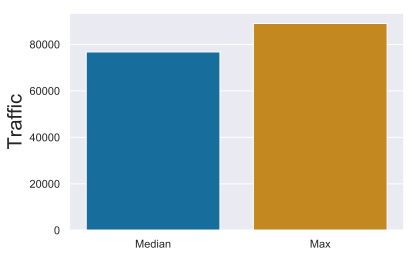

In [25]:
median_max_plot = sns.barplot(x="STATUS", y='Traffic', data=median_vs_max_df, palette=("colorblind"),label = None)
median_max_plot.set_xlabel("")
median_max_plot.set_ylabel('Traffic',size = 20)
%config InlineBackend.figure_format = 'svg'

In [26]:


#%config InlineBackend.figure_format = 'jpeg'
figure = median_max_plot.get_figure()    
figure.savefig('max_vs_median.svg', dpi= 3000, bbox_inches='tight')

In [418]:
df4.head()

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday
408513,BOROUGH HALL,2017-10-21 00:00:00,319866143,75167161,3.197877e+08,7.511924e+07,78473.0,47918.0,126391.0,2017-10-21 00:00:00,Saturday
1196435,RIT-MANHATTAN,2018-09-08 01:00:00,2354539,32852,2.230281e+06,3.089700e+04,124258.0,1955.0,126213.0,2018-09-08 01:00:00,Saturday
557588,DELANCEY/ESSEX,2017-11-25 00:00:00,1724536864,1121518690,1.724472e+09,1.121469e+09,64646.0,49409.0,114055.0,2017-11-25 00:00:00,Saturday
251311,7 AV,2017-09-30 01:00:00,1906508049,850160370,1.906462e+09,8.501127e+08,46517.0,47667.0,94184.0,2017-09-30 01:00:00,Saturday
173149,34 ST-PENN STA,2017-11-07 19:00:00,1718638825,1734624883,1.718602e+09,1.734573e+09,37185.0,52379.0,89564.0,2017-11-07 19:00:00,Tuesday


In [420]:
BOROUGH_HALL = df4[df4['STATION'] == 'BOROUGH HALL']

In [421]:
BOROUGH_HALL.sort_

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday
408513,BOROUGH HALL,2017-10-21 00:00:00,319866143,75167161,319787670.0,75119243.0,78473.0,47918.0,126391.0,2017-10-21 00:00:00,Saturday
408692,BOROUGH HALL,2017-11-15 19:00:00,320695913,75682802,320678982.0,75676038.0,16931.0,6764.0,23695.0,2017-11-15 19:00:00,Wednesday
409410,BOROUGH HALL,2018-03-06 19:00:00,204447288,76880240,204430796.0,76873427.0,16492.0,6813.0,23305.0,2018-03-06 19:00:00,Tuesday
409357,BOROUGH HALL,2018-02-27 19:00:00,204223504,76741381,204206990.0,76734600.0,16514.0,6781.0,23295.0,2018-02-27 19:00:00,Tuesday
408647,BOROUGH HALL,2017-11-08 19:00:00,320473498,75544662,320457023.0,75537952.0,16475.0,6710.0,23185.0,2017-11-08 19:00:00,Wednesday
408686,BOROUGH HALL,2017-11-14 19:00:00,320653056,75656939,320636754.0,75650132.0,16302.0,6807.0,23109.0,2017-11-14 19:00:00,Tuesday
408798,BOROUGH HALL,2017-11-30 19:00:00,321124060,75950240,321107529.0,75943673.0,16531.0,6567.0,23098.0,2017-11-30 19:00:00,Thursday
408654,BOROUGH HALL,2017-11-09 19:00:00,320515317,75570259,320498916.0,75563589.0,16401.0,6670.0,23071.0,2017-11-09 19:00:00,Thursday
409363,BOROUGH HALL,2018-02-28 19:00:00,204265220,76767444,204248947.0,76760700.0,16273.0,6744.0,23017.0,2018-02-28 19:00:00,Wednesday
408714,BOROUGH HALL,2017-11-16 19:00:00,320737304,75708334,320720926.0,75701698.0,16378.0,6636.0,23014.0,2017-11-16 19:00:00,Thursday


In [411]:
df4.sort_values(by ='net_entries', ascending = False )
df4['DATE_format'] = pd.to_datetime(df4['DATE'],format="%m/%d/%Y")

KeyError: 'DATE'

In [ ]:
df4.head()

In [ ]:
df4['weekday'] = df4['DATE_format'].dt.day_name()

df4.head()

In [ ]:
df5 = df4.sort_values(by ='net_entries', ascending = False )


In [ ]:
median_of_rush_hour = df6_34ST_HERALD.net_entries.describe()

In [ ]:
time_quare =  df5[(df5['STATION'] == 'TIMES SQ-42 ST') & (df5['TIME'] == '20:00:00')]

In [ ]:
median_of_rush_hour_time_q = time_quare.net_entries.describe()

In [ ]:
median_of_rush_hour_time_q

In [ ]:
df7_34ST_PENN = df5[(df5['STATION'] == '34 ST-PENN STA') & (df5['TIME'] == '20:00:00')]

In [ ]:
median_of_rush_hour_PENN_STA = df7_34ST_PENN.net_entries.describe()

In [ ]:
median_of_rush_hour_PENN_STA

In [ ]:
median_of_rush_hour

In [ ]:
df5['net_traffic'] = df5['net_entries'] + df5['net_exits']

In [ ]:
df5_sort_by_net_traffic = df5.sort_values(by = 'net_traffic', ascending = False)

In [ ]:
sutter_av_saturday_8_12 = df5[(df5['STATION'] == 'SUTTER AV-RUTLD')]

In [ ]:
sutter_av_monday_8_12 = df5[(df5['STATION'] == 'SUTTER AV-RUTLD') & (df5['TIME'] == '00:00:00')&(df5['weekday'] == 'Monday')]

In [ ]:
sutter_av_saturday_8_12.sort_values(by = 'net_exits', ascending = False)

In [ ]:
df5_sort_by_net_traffic.head(10)

In [ ]:

df.dropna(how = 'any')

#idx = pd.IndexSlice
df.rename(columns={'ENTRIES': 'cumulative_entries', 'EXITS                                                               ': 'cumulative_exits'}, inplace=True)
df['net_entries'] = df.cumulative_entries.diff()
df['net_exits'] = df.cumulative_exits.diff()
#df.dropna(how = 'any')
df1 = df[(df['TIME'] == '00:00:00') | \
          (df['TIME'] == '04:00:00') | \
          (df['TIME'] == '08:00:00') | \
          (df['TIME'] == '12:00:00') | \
          (df['TIME'] == '16:00:00') | \
          (df['TIME'] == '20:00:00')].copy()
df2 = df1[(df1.net_entries >0) & (df1.net_entries < 100000) & (df1.net_exits >0) & (df1.net_exits < 100000) ].copy()
df2['net_traffic'] = df2['net_entries'] + df2['net_exits']
#just pick one station
#df2 = df1[df1.STATION == 'CITY HALL']
df3 = df2.groupby(['DATE','TIME']).sum()

#show all the station pattern during a week's day and the time during the day.
df3.net_traffic.plot()
